In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
# Reference: https://machinelearningcoban.com/2017/06/21/pca2/
import numpy as np
from matplotlib import image # for loading image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(1)

# filename structure
path = '/gdrive/My Drive/COTAI - Shared TO members/VTCA-COTAI-Practitioner-FoundationCourse/All-LabTemplates/faces/' # path to the database
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix_sub = 'subject'
surfix = '.pgm'

fn = ''
h = 116 # hight 
w = 98 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))

# image is a 2-dimensions array, but the library PCA of sklearn requires each 
# sample must be in the format of 1-dimension array. Ok, let's format our 
# samples
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix_sub + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] =  image.imread(fn).reshape(D)
        cnt += 1

In [0]:
# Doing PCA, note that each row is a datapoint

# n_components=100 ==> We just wanna decompose into 100 images
# that will be used as a base to reconstruct (or approximate) image later
# the bigger n_components, the more similar reconstructed image (compared with original image)
pca100 = PCA(n_components=100)
pca100.fit(X.T)
# projection matrix 
U100 = pca100.components_.T

In [0]:
pca50 = PCA(n_components=50)
pca50.fit(X.T)
# projection matrix 
U50 = pca50.components_.T

In [0]:
pca10 = PCA(n_components=10)
pca10.fit(X.T)
# projection matrix 
U10 = pca10.components_.T

In [0]:
pca5 = PCA(n_components=5)
pca5.fit(X.T)
# projection matrix 
U5 = pca5.components_.T

In [0]:
# using this function to save image to disk (or google drive). you can
# read more about library pyplot here: https://matplotlib.org/tutorials/introductory/pyplot.html
# or just call this function once you wanna save a face image
def save_image(image_matrix, figure_index, fn, show=False):
    import matplotlib.pyplot as plt
    plt.figure(figure_index)
    plt.axis('off')
    f1 = plt.imshow(image_matrix.reshape(116, 98), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    # f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()

# save each eigenface (khuôn mặt đặc trưng riêng) to disk (or google drive)
def save_eigenfaces(U, prefix, path=''):
    for i in range(U.shape[1]):
        image_matrix = U[:, i]
        fn = path + prefix + '_eigenface' + str(i).zfill(2) + '.png'
        save_image(image_matrix, i, fn, False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


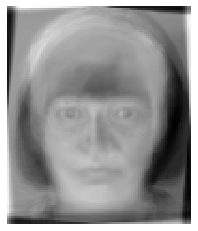

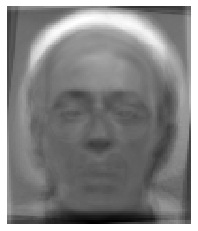

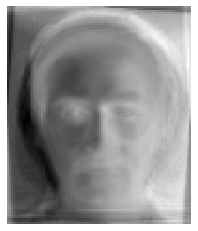

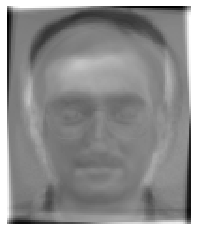

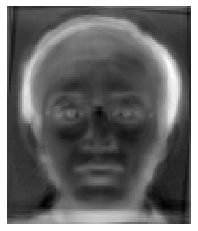

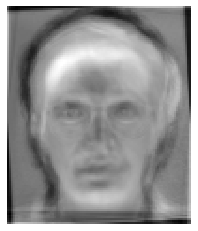

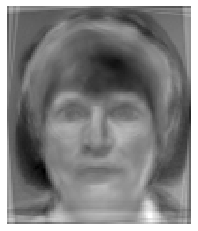

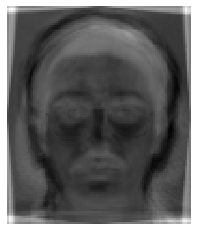

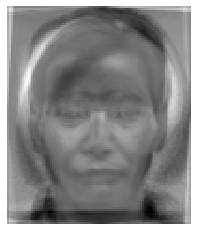

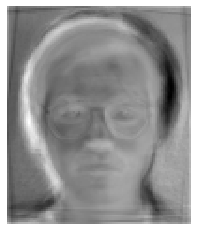

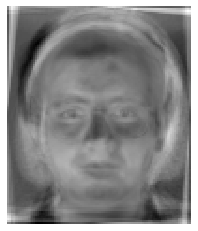

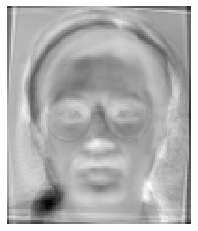

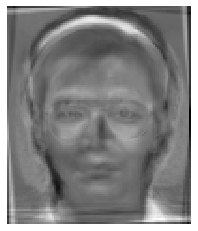

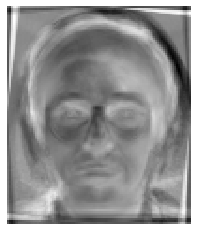

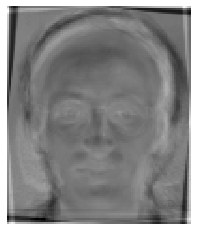

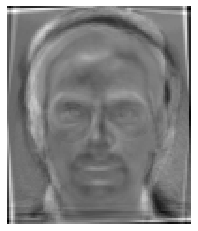

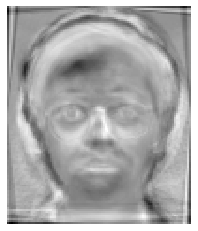

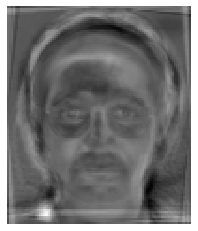

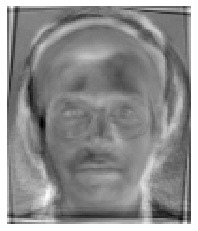

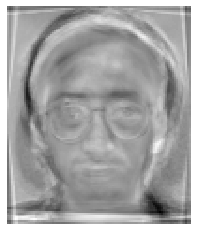

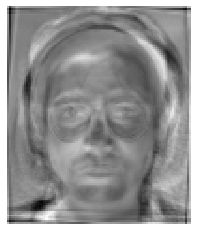

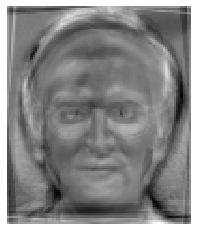

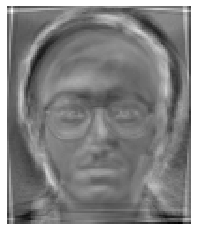

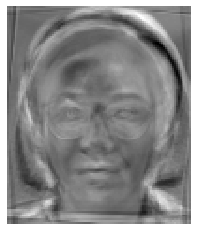

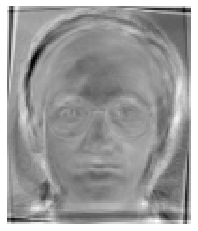

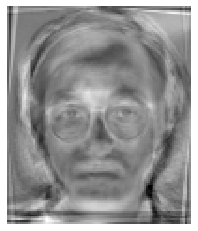

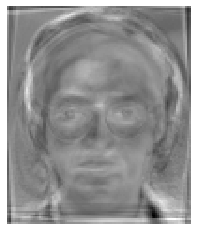

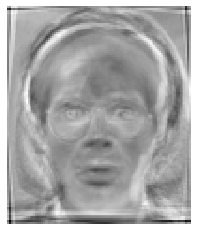

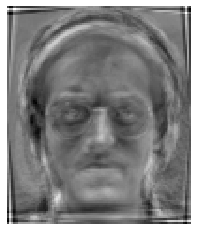

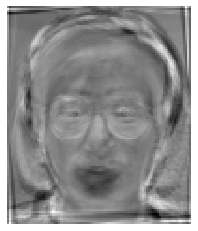

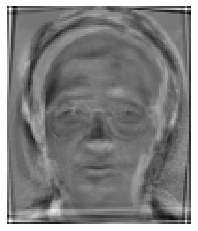

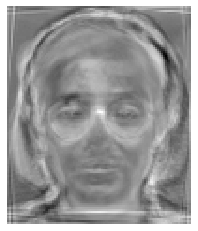

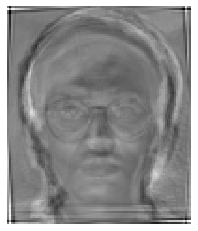

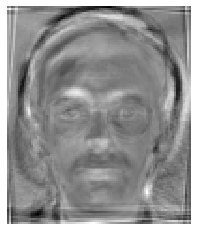

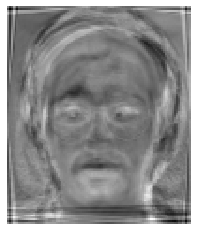

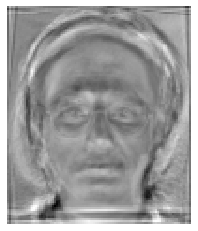

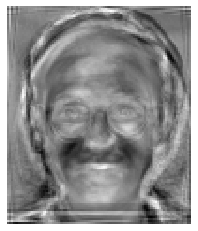

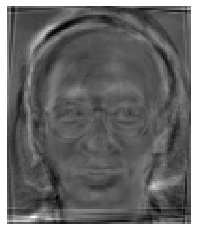

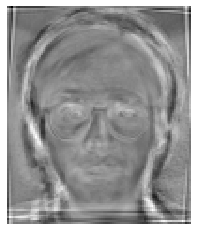

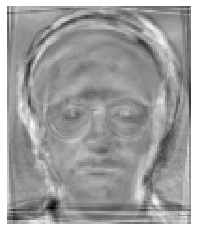

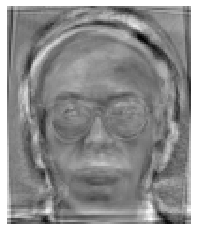

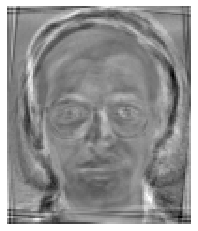

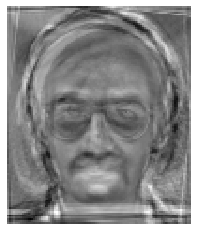

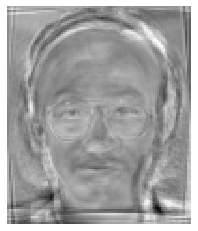

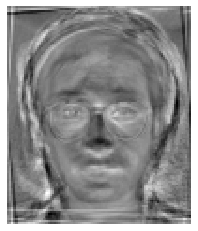

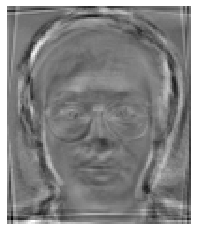

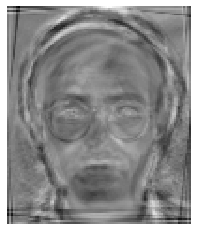

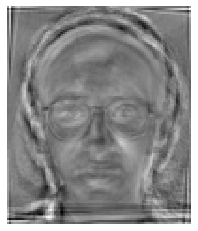

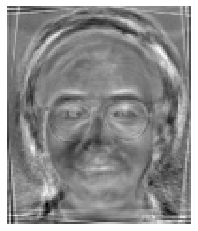

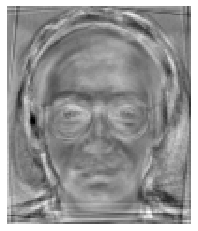

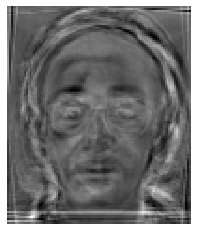

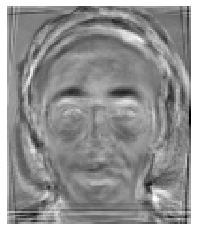

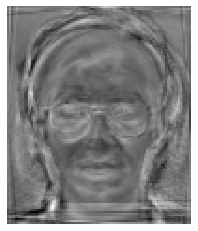

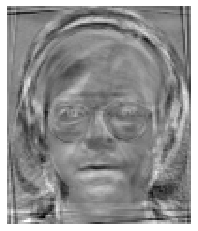

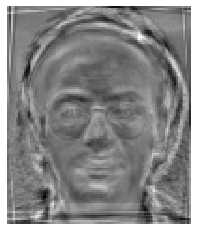

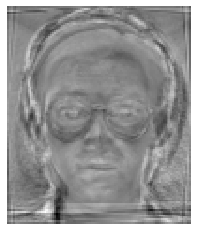

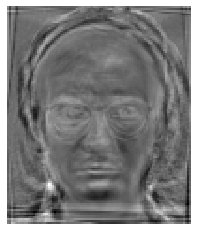

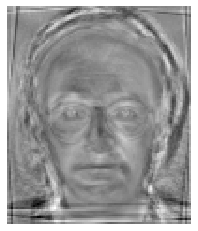

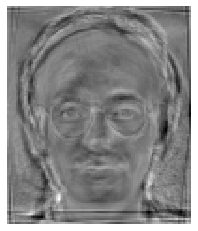

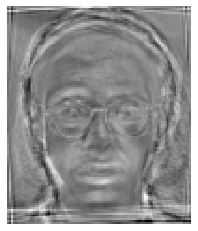

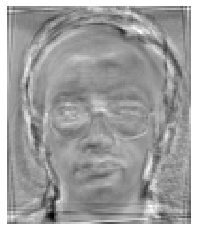

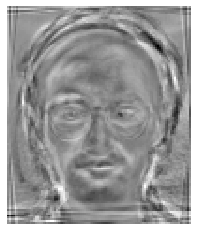

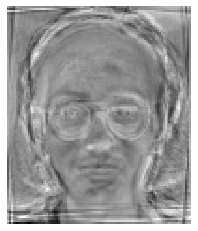

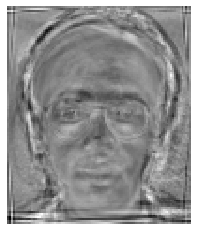

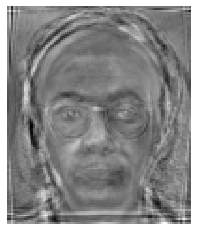

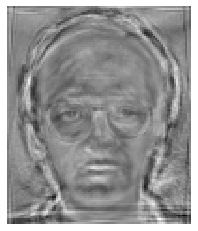

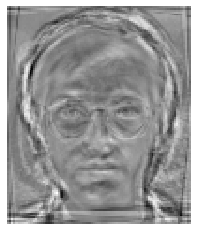

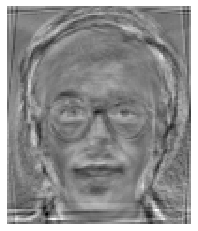

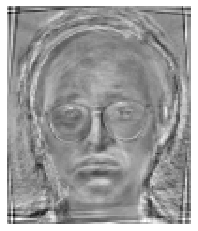

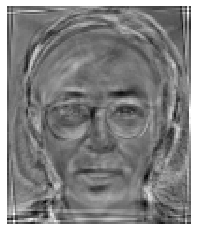

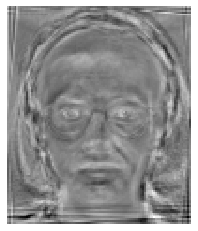

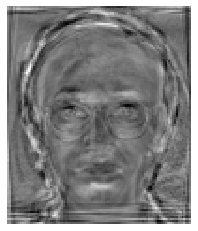

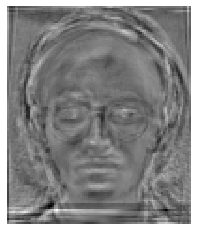

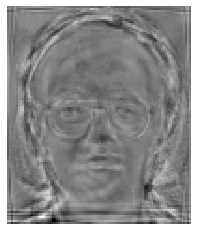

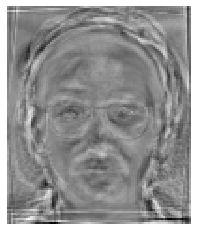

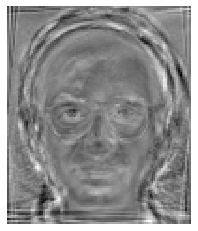

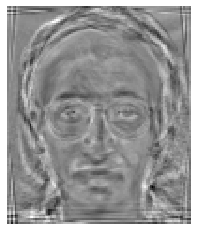

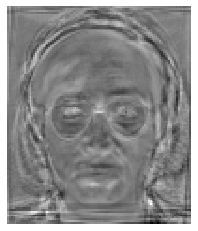

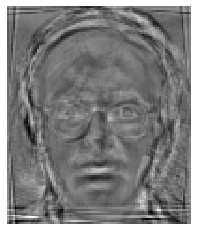

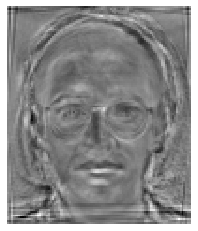

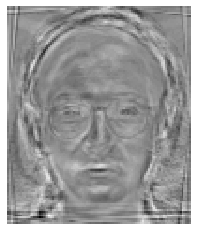

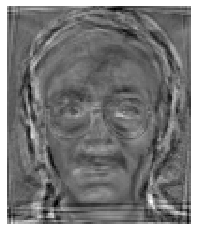

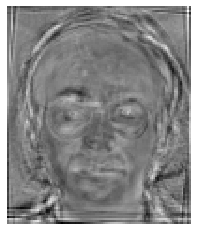

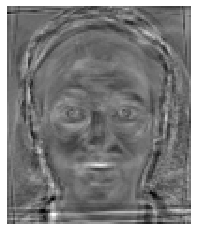

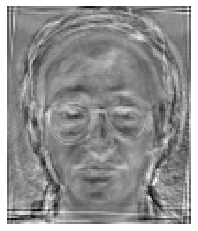

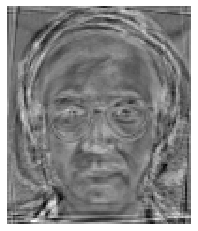

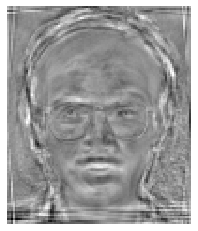

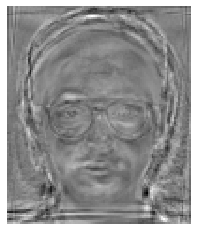

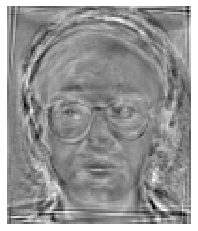

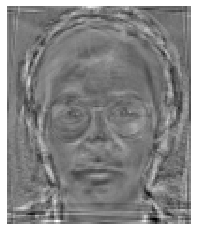

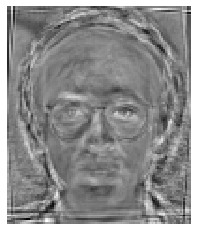

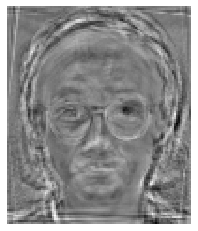

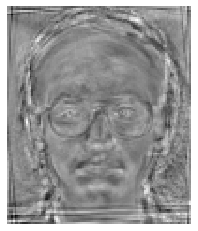

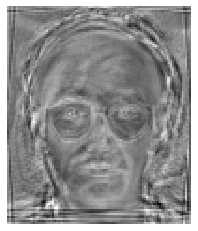

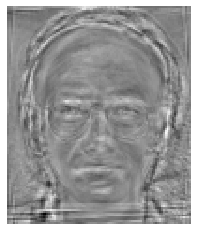

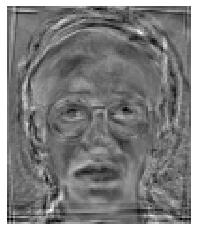

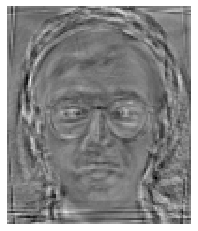

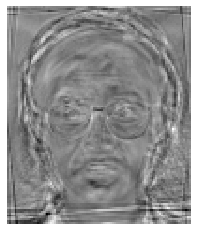

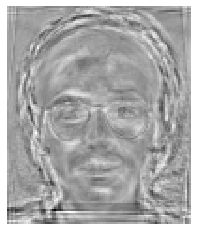

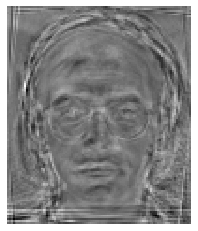

In [0]:
save_eigenfaces(U100, 'u100', path)

In [0]:
save_eigenfaces(U50, 'u50', path)

In [0]:
save_eigenfaces(U10, 'u10', path)

In [0]:
save_eigenfaces(U5, 'u5', path)

In [0]:
# Trying to reconstruct image of several people
def reconstruct_images(pca, prefix_sub, prefix='', path='', limit=2):
    U = pca.components_.T
    for person_id in range(1, limit+1):
        for state in ['centerlight']:
            fn = path + prefix_sub + str(person_id).zfill(2) + '.' + state + surfix
            im = image.imread(fn)

            fn_ori = path + prefix + '_ori' + str(person_id).zfill(2) + '.png'
            save_image(im, person_id, fn_ori, True)

            # Now to visualize how these images look we need to inverse transform the 100 (or 50, 10, 5...) images 
            # back to 116x98 dimension. Note that we're not reverting back to the original data, 
            # we're simply going back to the actual dimension of the original images so 
            # we can visualize them

            # reshape and subtract mean
            x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
            # encode
            z = U.T.dot(x)
            #decode
            x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

            # reshape to orginal dim
            im_tilde = x_tilde.reshape(116, 98)
            fn_tidle = path + prefix + '_res' + str(person_id).zfill(2) + '.png'
            save_image(im_tilde, person_id, fn_tidle, True)

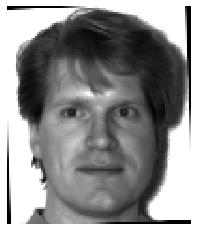

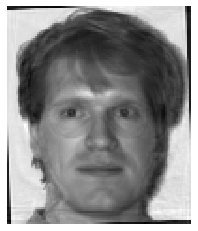

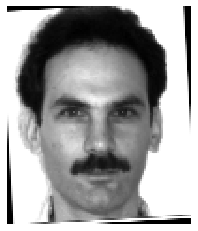

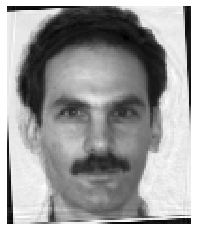

In [0]:
reconstruct_images(pca100, prefix_sub, 'u100', path, limit=2)

In [0]:
reconstruct_images(pca50, prefix_sub, 'u50', path, limit=2)

In [0]:
reconstruct_images(pca10, prefix_sub, 'u10', path, limit=2)

In [0]:
reconstruct_images(pca5, prefix_sub, 'u5', path, limit=2)